In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [2]:
# Read dataset file
df = pd.read_csv('MBB.csv')
df = df[['Price']]
df = df.dropna()
df

,Price
0,11783.9
1,12267.4
2,12267.4
3,12307.6
4,12448.7
...,...
1237,18850.0
1238,18800.0
1239,18450.0
1240,18600.0


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# Normalize the data
mean = train_data.mean()
meant = test_data.mean()
meanv = val_data.mean()
std = train_data.std()
stdt = test_data.std()
stdv = val_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - meant) / stdt
val_data = (val_data - meanv) / stdv

In [5]:
# Prepare the data for CNN
window_size = 10

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data.values, window_size)
X_test, y_test = create_sequences(test_data.values, window_size)
X_val, y_val = create_sequences(val_data.values, window_size)


In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
20/20 [==============================] - 13s 16ms/step - loss: 0.4804 - val_loss: 0.1696
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1279 - val_loss: 0.1111
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0963 - val_loss: 0.0995
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0853 - val_loss: 0.0896
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0759 - val_loss: 0.0828
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0725 - val_loss: 0.0830
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0704 - val_loss: 0.0752
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0630 - val_loss: 0.0741
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0566 - val_loss: 0.0700
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0539 - val_loss: 0.0659
Epoch 1

In [8]:
# Make predictions
y_pred = model.predict(X_test)
# Inverse transform the predictions
y_pred = y_pred * pd.Series(stdt).values[0] + pd.Series(meant).values[0]

12/12 [==============================] - 0s 4ms/step


In [9]:
# Make predictions
y_vpred = model.predict(X_val)
# Inverse transform the predictions
y_vpred = y_vpred * pd.Series(stdv).values[0] + pd.Series(meanv).values[0]

8/8 [==============================] - 0s 2ms/step


In [ ]:
df

,Price
0,11783.9
1,12267.4
2,12267.4
3,12307.6
4,12448.7
...,...
1237,18850.0
1238,18800.0
1239,18450.0
1240,18600.0


In [10]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# re make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
# re make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAPE:", test_mae)

Validation RMSE: 2993.063646437826
Testing RMSE: 5902.994680465755
Validation MAPE: 12.212350695348704
Testing MAPE: 23.988983411621852
Validation MAE: 2363.6237477137893
Testing MAPE: 4599.950455636342


In [ ]:
y_val

array([21916.7, 22375. , 23375. , 23041.7, 23333.3, 23416.7, 23125. ,
       23000. , 22666.7, 22833.3, 22708.3, 22458.3, 23291.7, 23166.7,
       22916.7, 21375. , 21250. , 20750. , 20750. , 19416.7, 18750. ,
       18708.3, 19541.7, 20041.7, 19750. , 20083.3, 20583.3, 20583.3,
       20166.7, 20166.7, 20500. , 21208.3, 20750. , 20916.7, 20875. ,
       20333.3, 20875. , 21083.3, 21250. , 21208.3, 21166.7, 21000. ,
       21291.7, 21333.3, 21291.7, 21041.7, 20958.3, 20750. , 21291.7,
       21375. , 22083.3, 22250. , 22416.7, 22458.3, 22458.3, 22583.3,
       22791.7, 22666.7, 22333.3, 22541.7, 22791.7, 22708.3, 23125. ,
       23041.7, 23000. , 23100. , 23200. , 23300. , 23650. , 23600. ,
       23400. , 23650. , 23750. , 23600. , 23650. , 23000. , 22800. ,
       22700. , 22600. , 22550. , 22400. , 22150. , 21800. , 21000. ,
       21350. , 21200. , 21250. , 21000. , 20100. , 20200. , 19950. ,
       19800. , 20000. , 18700. , 18800. , 19200. , 18100. , 16950. ,
       17250. , 1605

In [ ]:
y_vpred

array([[22457.838],
       [22528.664],
       [22352.582],
       [22922.385],
       [23199.4  ],
       [22825.691],
       [21314.594],
       [20618.99 ],
       [20972.344],
       [20662.496],
       [19654.242],
       [18533.232],
       [18284.92 ],
       [19548.93 ],
       [20420.246],
       [20043.71 ],
       [19446.572],
       [20240.652],
       [20501.723],
       [20329.83 ],
       [20214.297],
       [20276.693],
       [21005.291],
       [21036.332],
       [20754.951],
       [20656.9  ],
       [20007.686],
       [20644.615],
       [21410.582],
       [21063.533],
       [21039.414],
       [21132.283],
       [21007.453],
       [21047.074],
       [21348.867],
       [21253.162],
       [21007.695],
       [20911.324],
       [20857.855],
       [21150.977],
       [21456.992],
       [21860.805],
       [22096.918],
       [22183.623],
       [22277.121],
       [22224.652],
       [22326.238],
       [22543.164],
       [22576.877],
       [22219.47 ],


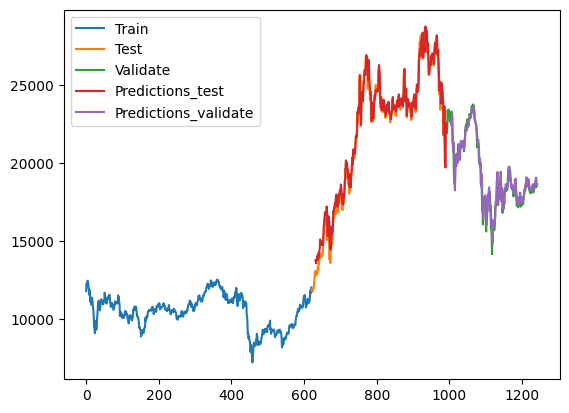

In [11]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index[-len(y_pred):], y_pred)
plt.plot(val_data.index[-len(y_vpred):], y_vpred)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()

In [ ]:
y_val

array([21916.7, 22375. , 23375. , 23041.7, 23333.3, 23416.7, 23125. ,
       23000. , 22666.7, 22833.3, 22708.3, 22458.3, 23291.7, 23166.7,
       22916.7, 21375. , 21250. , 20750. , 20750. , 19416.7, 18750. ,
       18708.3, 19541.7, 20041.7, 19750. , 20083.3, 20583.3, 20583.3,
       20166.7, 20166.7, 20500. , 21208.3, 20750. , 20916.7, 20875. ,
       20333.3, 20875. , 21083.3, 21250. , 21208.3, 21166.7, 21000. ,
       21291.7, 21333.3, 21291.7, 21041.7, 20958.3, 20750. , 21291.7,
       21375. , 22083.3, 22250. , 22416.7, 22458.3, 22458.3, 22583.3,
       22791.7, 22666.7, 22333.3, 22541.7, 22791.7, 22708.3, 23125. ,
       23041.7, 23000. , 23100. , 23200. , 23300. , 23650. , 23600. ,
       23400. , 23650. , 23750. , 23600. , 23650. , 23000. , 22800. ,
       22700. , 22600. , 22550. , 22400. , 22150. , 21800. , 21000. ,
       21350. , 21200. , 21250. , 21000. , 20100. , 20200. , 19950. ,
       19800. , 20000. , 18700. , 18800. , 19200. , 18100. , 16950. ,
       17250. , 1605

In [ ]:
y_vpred

array([[22457.838],
       [22528.664],
       [22352.582],
       [22922.385],
       [23199.4  ],
       [22825.691],
       [21314.594],
       [20618.99 ],
       [20972.344],
       [20662.496],
       [19654.242],
       [18533.232],
       [18284.92 ],
       [19548.93 ],
       [20420.246],
       [20043.71 ],
       [19446.572],
       [20240.652],
       [20501.723],
       [20329.83 ],
       [20214.297],
       [20276.693],
       [21005.291],
       [21036.332],
       [20754.951],
       [20656.9  ],
       [20007.686],
       [20644.615],
       [21410.582],
       [21063.533],
       [21039.414],
       [21132.283],
       [21007.453],
       [21047.074],
       [21348.867],
       [21253.162],
       [21007.695],
       [20911.324],
       [20857.855],
       [21150.977],
       [21456.992],
       [21860.805],
       [22096.918],
       [22183.623],
       [22277.121],
       [22224.652],
       [22326.238],
       [22543.164],
       [22576.877],
       [22219.47 ],
